## Analysis of Known Profiles
#### Anna Möller anna.moeller@fau.de

_____
### 1. Import libraries:

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib.pyplot as plt
import json
import os
import cv2
import time
import numpy as np
from csbdeep.utils import Path, normalize
import sys

import pickle
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import seaborn as sns
import umap

sys.path.append("/data_slow/je30bery/spatial_proteomics/segmentation")
from segmentation import MELC_Segmentation
from initial_analysis import ExpressionAnalyzer

/data/je30bery/.local/lib/python3.9/site-packages/umap/distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/data/je30bery/.local/lib/python3.9/site-packages/umap/distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/data/je30bery/.local/lib/python3.9/site-packages/umap/distances.py:1086: NumbaDeprecationWarning:

_____
### 2. Specify data path and create segmentation and analysis object
Step-wise insights into segmentation in segmentation_demo.ipynb!    
Specify one or more membrane markers: 

In [3]:
f = open('/data_slow/je30bery/spatial_proteomics/config.json')
config = json.load(f)

data_path = config["ALS"]
segmentation_results_dir = config["segmentation_results"]
base_path = config["base_path"]

EA = ExpressionAnalyzer(data_path=data_path, segmentation_results_dir_path=segmentation_results_dir, base_path=base_path, membrane_markers=["cd45"], save_plots=False)

### _____
### 3. Run Analysis   
To get overview of all available markers per field of view run with empty profile:

In [4]:
EA.run(segment="nuclei", profile=None)
print(list(EA.markers['ALS01 - 21297'].keys()))

Calculating expression: 100%|███████████████████████████████████████████████████████████████████| 36/36 [00:00<00:00, 443.48it/s]

['CD11b-PE', 'CD16-PE', 'CD2-FITC', 'CD26-PE', 'CD29-FITC', 'CD3-PE', 'CD36-FITC', 'CD38-PE', 'CD4-PE', 'CD45-PE', 'CD45RA-PE', 'CD56-PE', 'CD57-PE', 'CD7-PE', 'CD8-PE', 'HLA-DQ-FITC', 'HLA-DR-PE', 'NeuN-AF488', 'PBS']


_____
Specify segment ("nuclei" or "cell") and profile.

Calculating expression: 100%|███████████████████████████████████████████████████████████████████| 36/36 [00:00<00:00, 504.08it/s]


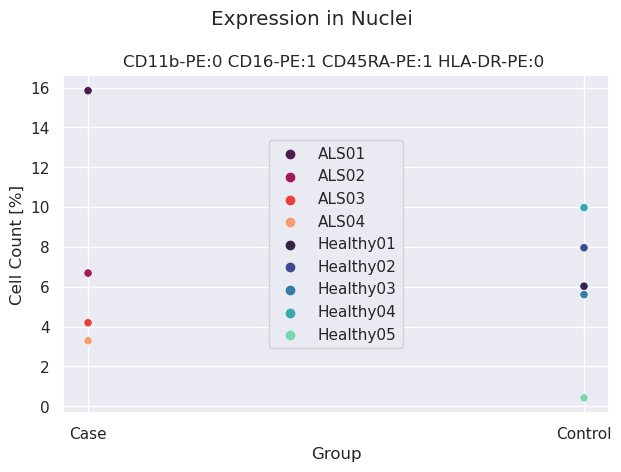

In [5]:
EA.run(segment="nuclei", profile={'CD11b-PE': 0, 'CD16-PE': 1, 'CD45RA-PE': 1, 'HLA-DR-PE': 0})

Calculating expression: 100%|████████████████████████████████████████████████████████████████████| 36/36 [00:00<00:00, 49.65it/s]


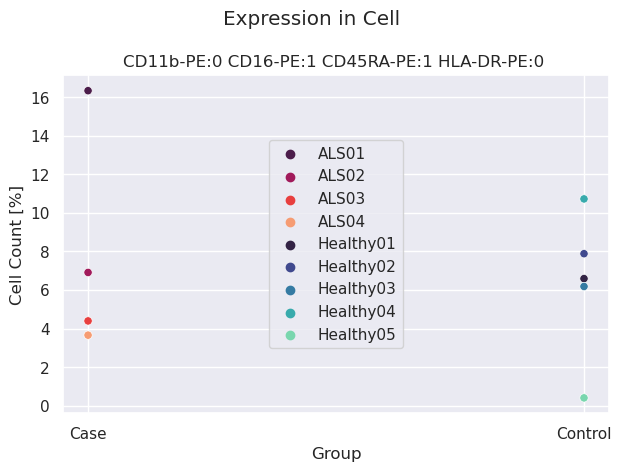

In [6]:
EA.run(segment="cell", profile={'CD11b-PE': 0, 'CD16-PE': 1, 'CD45RA-PE': 1, 'HLA-DR-PE': 0})

Calculating expression: 100%|███████████████████████████████████████████████████████████████████| 36/36 [00:00<00:00, 501.62it/s]


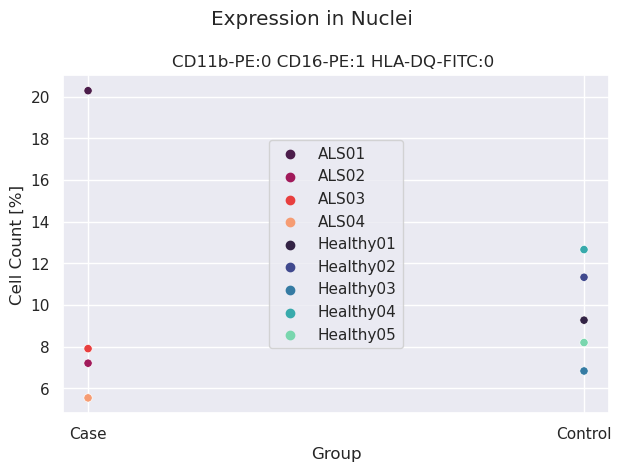

In [7]:
EA.run(segment="nuclei", profile={'CD11b-PE': 0, 'CD16-PE': 1, 'HLA-DQ-FITC': 0})

Calculating expression: 100%|███████████████████████████████████████████████████████████████████| 36/36 [00:00<00:00, 436.99it/s]


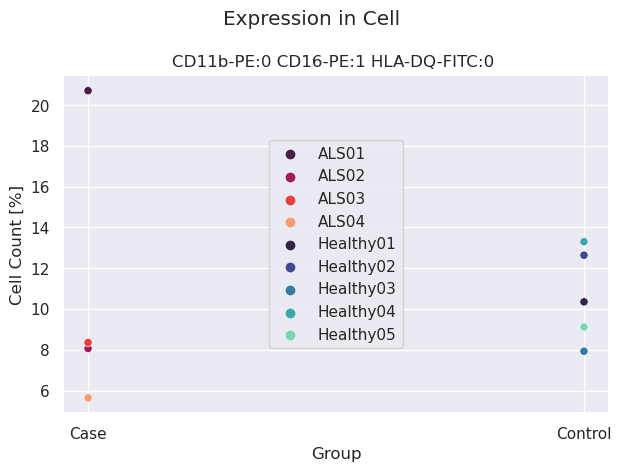

In [8]:
EA.run(segment="cell", profile={'CD11b-PE': 0, 'CD16-PE': 1, 'HLA-DQ-FITC': 0})